<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis-Dhilip vasanth</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 

<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import en_core_web_sm
from tqdm import tqdm
import xgboost as xgb

C:\Users\fsdq-\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\fsdq-\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\fsdq-\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _

## Reading Data

### Reading Gene and Variation Data

In [2]:
data=pd.read_csv("trainingvariant.csv")
data.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [3]:
print("No. of Records:{}".format(data.shape[0]))
print("No. of features:{}".format(data.shape[1]))
print("Name of the features:{}".format(data.columns.values))
print("Is there is null values:{}".format(len(data[data.isnull().all(axis=1)])))

No. of Records:3321
No. of features:4
Name of the features:['ID' 'Gene' 'Variation' 'Class']
Is there is null values:0


In [4]:
data.shape

(3321, 4)

<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

### Reading Text Data

In [3]:
data_text=pd.read_csv("trainingtext.csv",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
data_text.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [6]:
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


In [7]:
data_text.shape

(3321, 2)

## Preprocessing of Text

In [4]:
stop_words=set(stopwords.words("english"))

def text_preprocessing(text,column,Index):
    if type(text) is not int:
        string=""
        text=re.sub('[^a-zA-Z0-9\n]', ' ',text)
        text=re.sub('\s+',' ',text)
        text=text.lower()
    
        for word in text.split():
            if word not in stop_words:
                string+=word+" "
    data_text[column][Index]=string



In [5]:
for index,rows in data_text.iterrows():
    if type(rows['TEXT']) is str:
        text_preprocessing(rows["TEXT"],column="TEXT",Index=index)
    else:
        print("there is no text description for id:",index)
        

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755


In [6]:
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [7]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [8]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [9]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


## Test, Train and Cross Validation Split

#### Splitting data into train, test and cross validation (64:20:16)

In [10]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [16]:
train_df.shape

(2124, 5)

In [17]:
cv_df.shape

(532, 5)

In [18]:
test_df.shape

(665, 5)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [11]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


### Distribution of y_i's in Train, Test and Cross Validation datasets

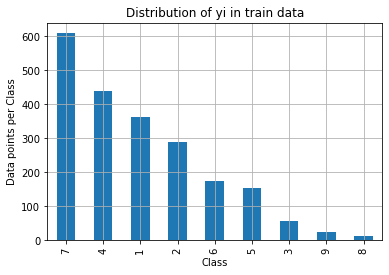

Number of data points in class 1 : 609 ( 28.672 %)
Number of data points in class 2 : 439 ( 20.669 %)
Number of data points in class 3 : 363 ( 17.09 %)
Number of data points in class 4 : 289 ( 13.606 %)
Number of data points in class 5 : 176 ( 8.286 %)
Number of data points in class 6 : 155 ( 7.298 %)
Number of data points in class 7 : 57 ( 2.684 %)
Number of data points in class 8 : 24 ( 1.13 %)
Number of data points in class 9 : 12 ( 0.565 %)


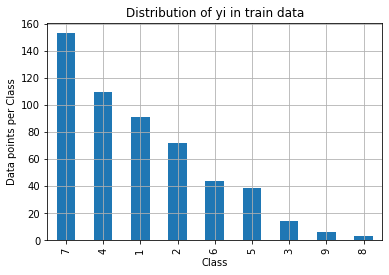

Number of data points in class 1 : 153 ( 28.759 %)
Number of data points in class 2 : 110 ( 20.677 %)
Number of data points in class 3 : 91 ( 17.105 %)
Number of data points in class 4 : 72 ( 13.534 %)
Number of data points in class 5 : 44 ( 8.271 %)
Number of data points in class 6 : 39 ( 7.331 %)
Number of data points in class 7 : 14 ( 2.632 %)
Number of data points in class 8 : 6 ( 1.128 %)
Number of data points in class 9 : 3 ( 0.564 %)


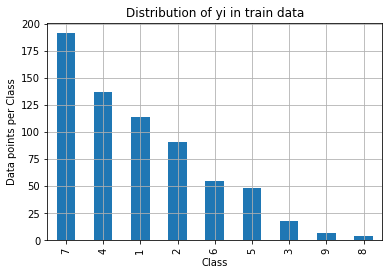

Number of data points in class 1 : 191 ( 28.722 %)
Number of data points in class 2 : 137 ( 20.602 %)
Number of data points in class 3 : 114 ( 17.143 %)
Number of data points in class 4 : 91 ( 13.684 %)
Number of data points in class 5 : 55 ( 8.271 %)
Number of data points in class 6 : 48 ( 7.218 %)
Number of data points in class 7 : 18 ( 2.707 %)
Number of data points in class 8 : 7 ( 1.053 %)
Number of data points in class 9 : 4 ( 0.602 %)


In [12]:
train_class_distribution = train_df['Class'].value_counts()
test_class_distribution = test_df['Class'].value_counts()
cv_class_distribution = cv_df['Class'].value_counts()
#---------------------------------------------Train-data----------------------------------------------------------------
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

value=np.argsort(-train_class_distribution.values)
for i in value:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

#---------------------------------------------cv-data-------------------------------------------------------------------------
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()
value=np.argsort(-cv_class_distribution.values)
for i in value:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')

#---------------------------------------------test-data----------------------------------------------------------------------
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

value=np.argsort(-test_class_distribution.values)
for i in value:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')


## Univariate Analysis

### Univariate Analysis on Gene Feature


In [20]:
gene=train_df["Gene"].value_counts()
gene.head(10)

BRCA1     169
TP53      101
EGFR       94
BRCA2      79
PTEN       78
KIT        61
BRAF       61
ALK        45
ERBB2      45
PDGFRA     42
Name: Gene, dtype: int64

### observation:
Thus Gene features in the dataset is the categorical features

In [21]:
print("Ans: There are", gene.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 227 different categories of genes in the train data, and they are distibuted as follows


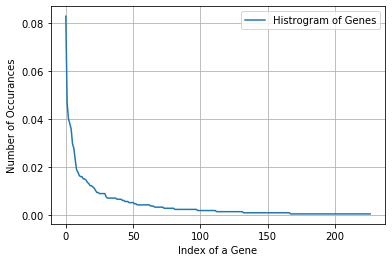

In [22]:
s = sum(gene.values);
h =gene.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

<h2>Gene feature(Categorical features)</h2>
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

### Response coding for Gene features

In [58]:
def get_fea_dict(alpha, feature, df):
    value_count = train_df[feature].value_counts()
    gv_dict = dict()
    for i, denominator in value_count.items():
        vec = []
        for k in range(1,10):
            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        gv_dict[i]=vec
    return gv_dict

def get_gv_feature(alpha, feature, df):
 
    gv_dict = get_fea_dict(alpha, feature, df)

    value_count = train_df[feature].value_counts()

    gv_fea = []
  
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])

    return gv_fea

In [54]:
alpha=1
train_gene_responce_coding=np.array(get_gv_feature(alpha,"Gene",train_df))
cv_gene_responce_coding=np.array(get_gv_feature(alpha,"Gene",cv_df))
test_gene_responce_coding=np.array(get_gv_feature(alpha,"Gene",test_df))

In [55]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_responce_coding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


### One hot encoding for gene features

In [11]:
gene_vectorizer=CountVectorizer()
train=gene_vectorizer.fit(train_df["Gene"])
train_gene_one_hot_encoding=gene_vectorizer.transform(train_df["Gene"])
cv_gene_one_hot_encoding=gene_vectorizer.transform(cv_df["Gene"])
test_gene_one_hot_encoding=gene_vectorizer.transform(test_df["Gene"])

In [12]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_one_hot_encoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 236)


In [13]:
train_gene_one_hot_encoding.shape

(2124, 236)

### Univariate Analysis on variation Feature

In [19]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
print(unique_variations.head(10))

Number of Unique Variations : 1922
Amplification           54
Deletion                52
Truncating_Mutations    49
Fusions                 21
Overexpression           5
E17K                     3
C618R                    2
M1R                      2
T58I                     2
K117N                    2
Name: Variation, dtype: int64


In [29]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1938 different categories of variations in the train data, and they are distibuted as follows


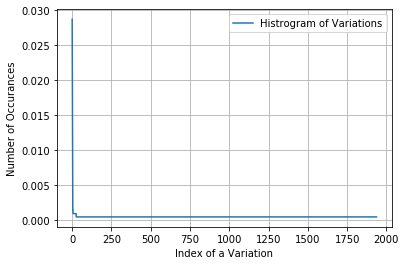

In [30]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.0287194  0.05084746 0.06826742 ... 0.99905838 0.99952919 1.        ]


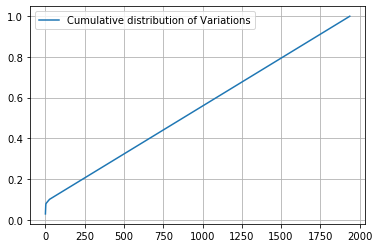

In [31]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

### Response coding for variation features

In [56]:
alpha = 1
# train gene feature
train_variation_responce_coding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_responce_coding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_response_coding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [57]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_responce_coding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


### one hot encoding for variation features

In [12]:
variation_vectorizer = CountVectorizer()
train_variation_one_hot_encoding= variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_one_hot_encoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_one_hot_encoding = variation_vectorizer.transform(cv_df['Variation'])

In [15]:

print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_one_hot_encoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1968)


### Univariate Analysis on Text Feature

### One-hot encoding for text features:

In [46]:
vectorizer = CountVectorizer(min_df=3,decode_error='replace', encoding='utf-8')
train = vectorizer.fit(train_df['TEXT'].values.astype('U'))
train_text_one_hot_encoding=vectorizer.transform(train_df["TEXT"].values.astype("U"))
test_text_one_hot_encoding = vectorizer.transform(test_df['TEXT'].values.astype("U"))
cv_text_one_hot_encoding = vectorizer.transform(cv_df['TEXT'].values.astype("U"))

In [47]:
train_text_one_hot_encoding.shape

(2124, 58050)

In [48]:
test_text_one_hot_encoding.shape

(665, 58050)

In [49]:
cv_text_one_hot_encoding.shape

(532, 58050)

### Responce coding for text features:

In [79]:
def extract_dictionary_paddle(df):
    dictionary={}
    for index,row in df.iterrows():
        for word in row["TEXT"].split():
            dictionary[word]+=1
    return dictionary
        

In [61]:
def get_text_responce_coding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [ ]:
train_text__response_coding  = get_text_responce_coding(train_df)
test_text_feature_response_coding  = get_text_responce_coding(test_df)
cv_text_feature_response_coding  = get_text_responce_coding(cv_df)

In [ ]:
train_text_response_coding = (train_text__response_coding.T/train_text__response_coding.sum(axis=1)).T
test_text_response_coding = (test_text_feature_response_coding.T/test_text_feature_response_coding.sum(axis=1)).T
cv_text_response_coding = (cv_text_feature_response_coding.T/cv_text_feature_response_coding.sum(axis=1)).T

In [79]:
train_text_response_coding.shape

(2124, 9)

### Tfidf vector on text features:

In [11]:
train_tfidf=TfidfVectorizer(min_df=3,max_features=5000,decode_error='replace', encoding='utf-8')
traintfidf=train_tfidf.fit(train_df["TEXT"].values.astype("U"))
traintfidf=train_tfidf.transform(train_df["TEXT"].values.astype("U"))
cvtfidf=train_tfidf.transform(cv_df["TEXT"].values.astype("U"))
testtfidf=train_tfidf.transform(test_df["TEXT"].values.astype("U"))



In [14]:
features=np.array(train_tfidf.get_feature_names())
def get_top_tfidf_features(corpus,top=1000):
    tfidf=np.argsort(corpus.toarray())[::-1]
    return features[tfidf][:top]
   
#train_tfidf=get_top_tfidf_features(traintfidf,top=10000)
    
train_tfidf_features=get_top_tfidf_features(traintfidf,top=1000) 
train_tfidf_features.shape

(1000, 5000)

In [36]:
traintfidf.shape

(2124, 5000)

In [37]:
testtfidf.shape

(665, 5000)

In [38]:
cvtfidf.shape

(532, 5000)

### Top 10000 TF-IDF features

In [ ]:
trainfeature=np.array(train_tfidf.get_feature_names())
train_tfidf_features=np.argsort(traintfidf.toarray()).flatten()[::-1]
train_top_tfidf=trainfeature[train_tfidf_features]

### Tfidf w2v on text features:

In [ ]:
nlp = en_core_web_sm.load()
vecs1 = []
for qu1 in tqdm(list(train_df['TEXT'])):
    doc1 = nlp(qu1) 
    mean_vec1 = np.zeros([len(doc1),96])
    for word1 in doc1:
        vec1 = word1.vector
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
a = list(vecs1)

## Stacking all the features

In [85]:
#-----------------------------------------one-hot_encoding_features-------------------------------------------------------------
train_gene_variation_text_one_hot_encoding=hstack((train_gene_one_hot_encoding,train_variation_one_hot_encoding))
train_one_hot_encoding=hstack((train_gene_variation_text_one_hot_encoding,train_text_one_hot_encoding)).tocsr()
cv_gene_variation_text_one_hot_encoding=hstack((cv_gene_one_hot_encoding,cv_variation_one_hot_encoding))
cv_one_hot_encoding=hstack((cv_gene_variation_text_one_hot_encoding,cv_text_one_hot_encoding)).tocsr()
test_gene_variation_one_hot_encoding=hstack((test_gene_one_hot_encoding,test_variation_one_hot_encoding))
test_one_hot_encoding=hstack((test_gene_variation_one_hot_encoding,test_text_one_hot_encoding)).tocsr()

In [62]:
train_gene_responce_coding.shape

(2124, 9)

In [63]:
train_variation_responce_coding.shape

(2124, 9)

In [65]:
set1_total_train.shape

(2124, 59690)

In [66]:
set1_total_cv.shape

(532, 59690)

In [67]:
set1_total_test.shape

(665, 59690)

## Model Implementation

In [54]:
def plot_confusion_matrix(test_y,predict_y):
    Confusion=confusion_matrix(test_y,predict_y)
    precision=(Confusion/Confusion.sum(axis=0))
    Recall=((Confusion.T/Confusion.sum(axis=1)).T)
    labels=[1,2,3,4,5,6,7,8,9]
  
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(Confusion, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(precision, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
 
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(Recall, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()


In [82]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

### Random model

Log loss on Cross Validation Data using Random Model 2.503428754115542
Log loss on Test Data using Random Model 2.5460754038288953
-------------------- Confusion matrix --------------------


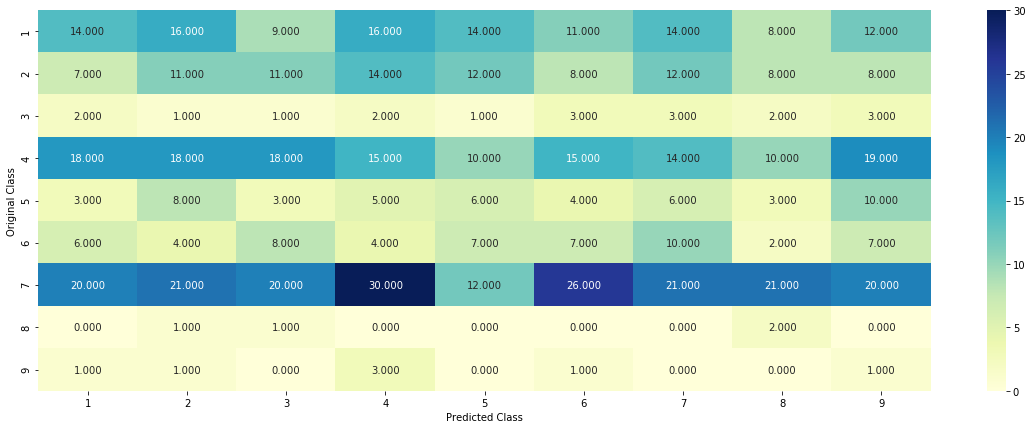

-------------------- Precision matrix (Columm Sum=1) --------------------


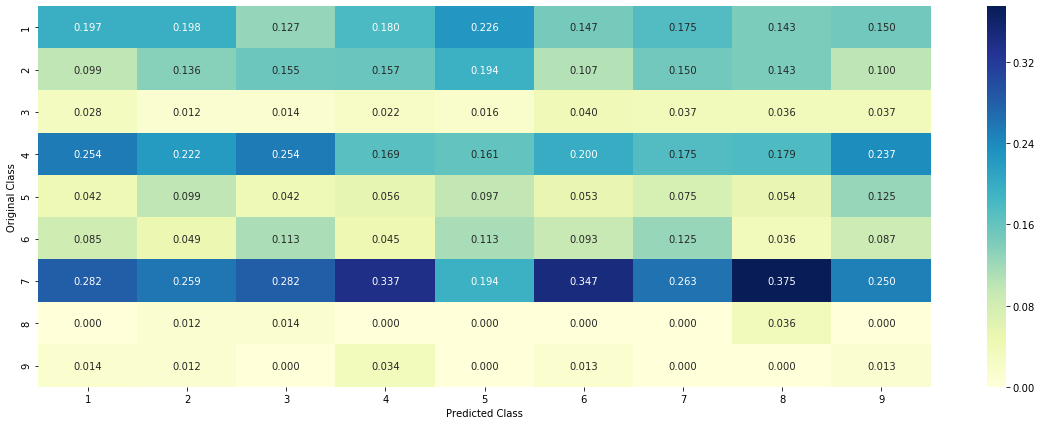

-------------------- Recall matrix (Row sum=1) --------------------


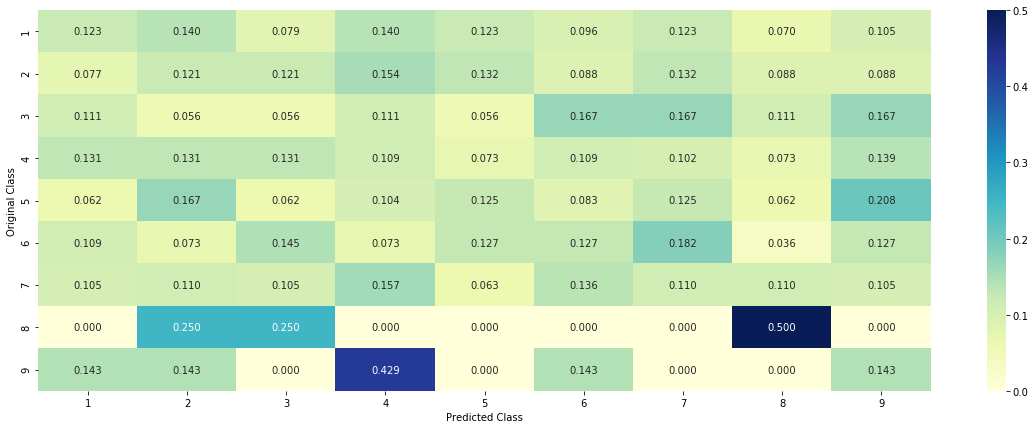

In [124]:
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

## Naive Bayes with hyper-parameter tuning

for alpha = 1e-05
Log Loss : 1.271694565600899
for alpha = 0.0001
Log Loss : 1.2714980846755146
for alpha = 0.001
Log Loss : 1.2597512023951163
for alpha = 0.1
Log Loss : 1.2479667678776578
for alpha = 1
Log Loss : 1.2636943576484652
for alpha = 10
Log Loss : 1.3831995423166603
for alpha = 100
Log Loss : 1.3637798346669194
for alpha = 1000
Log Loss : 1.3214468488934705


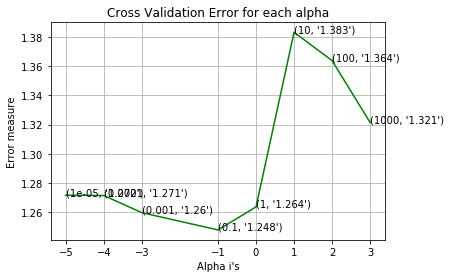

For values of best alpha =  0.1 The train log loss is: 0.8654446463436106
For values of best alpha =  0.1 The cross validation log loss is: 1.2479667678776578
For values of best alpha =  0.1 The test log loss is: 1.2492017349780113


In [112]:
alpha=[0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_one_hot_encoding,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_one_hot_encoding,y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_one_hot_encoding)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_one_hot_encoding,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_one_hot_encoding,y_train)


predict_y = sig_clf.predict_proba(train_one_hot_encoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_one_hot_encoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_one_hot_encoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### Testing the model with best hyper paramters

Log Loss : 1.2492017349780113
Number of missclassified point : 0.37894736842105264
-------------------- Confusion matrix --------------------


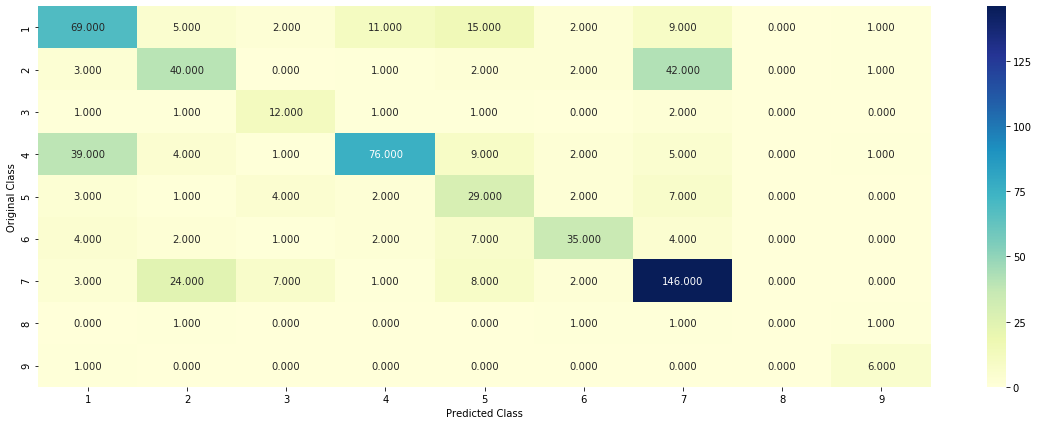

-------------------- Precision matrix (Columm Sum=1) --------------------


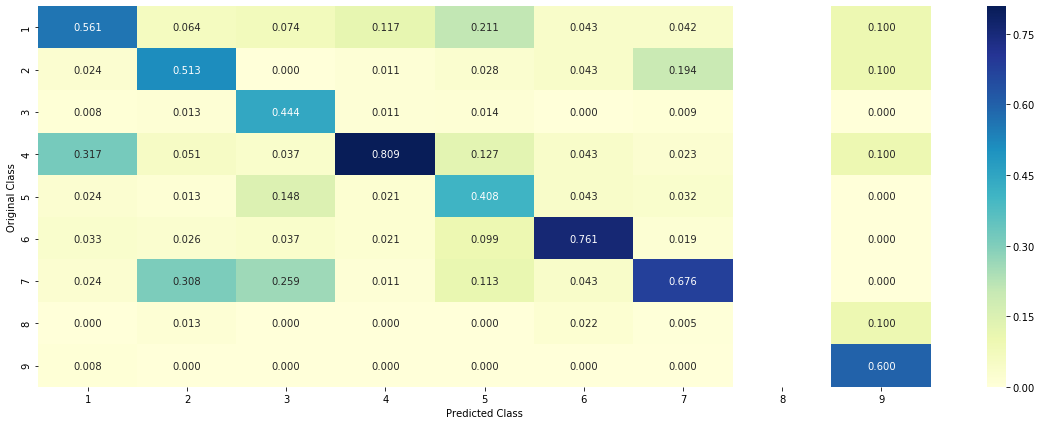

-------------------- Recall matrix (Row sum=1) --------------------


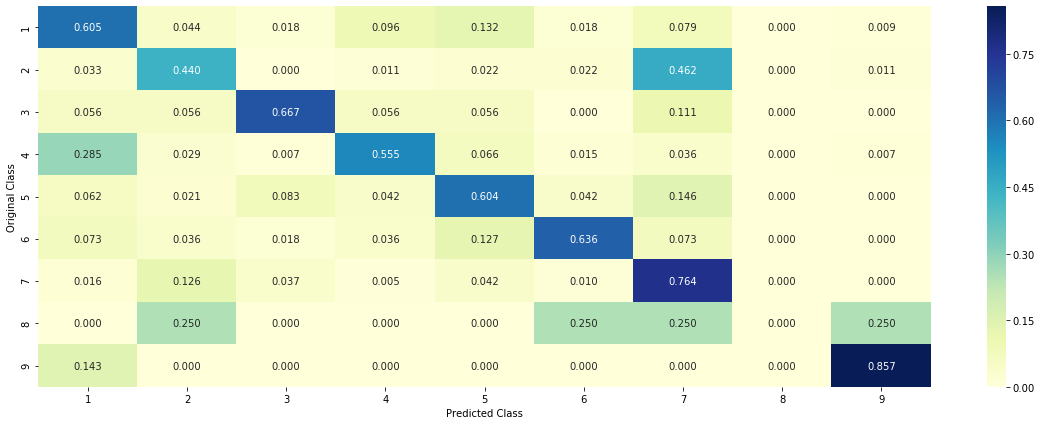

In [113]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_one_hot_encoding,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_one_hot_encoding,y_train)
sig_clf_probs = sig_clf.predict_proba(test_one_hot_encoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(y_test, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(test_one_hot_encoding)-y_test))/y_test.shape[0])
plot_confusion_matrix(y_test, sig_clf.predict(test_one_hot_encoding.toarray()))

### Feature importance and interpretability for correctly classified points

In [114]:
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [117]:
test_point_index = 6
no_feature = 100
predicted_cls = sig_clf.predict(test_one_hot_encoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_one_hot_encoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1761 0.068  0.0124 0.5586 0.0381 0.0314 0.1069 0.0044 0.0042]]
Actual Class : 4
--------------------------------------------------
Out of the top  100  features  0 are present in query point


### Feature importance and interpretability for incorrect classified points

In [ ]:
test_point_index = 6
no_feature = 100
predicted_cls = sig_clf.predict(test_one_hot_encoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_one_hot_encoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

## Logistic Regression with hyper-parameter

### with class-weight is balanced

for alpha = 1e-06
Log Loss : 1.2872910181726376
for alpha = 1e-05
Log Loss : 1.2672284723844773
for alpha = 0.0001
Log Loss : 1.1279743901921742
for alpha = 0.001
Log Loss : 1.113623015750494
for alpha = 0.01
Log Loss : 1.1727714426082319
for alpha = 0.1
Log Loss : 1.444840654697013
for alpha = 1
Log Loss : 1.6751084134103056
for alpha = 10
Log Loss : 1.7018236009397827
for alpha = 100
Log Loss : 1.7046262710074849


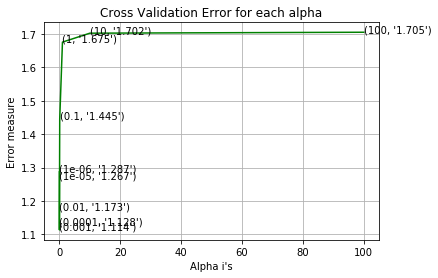

For values of best alpha =  0.001 The train log loss is: 0.5176746205269988
For values of best alpha =  0.001 The cross validation log loss is: 1.113623015750494
For values of best alpha =  0.001 The test log loss is: 1.0949708140359828


In [125]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_one_hot_encoding,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_one_hot_encoding,y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_one_hot_encoding)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_one_hot_encoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_one_hot_encoding, y_train)

predict_y = sig_clf.predict_proba(train_one_hot_encoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_one_hot_encoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_one_hot_encoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.0949708140359828
Number of mis-classified points : 0.3293233082706767
-------------------- Confusion matrix --------------------


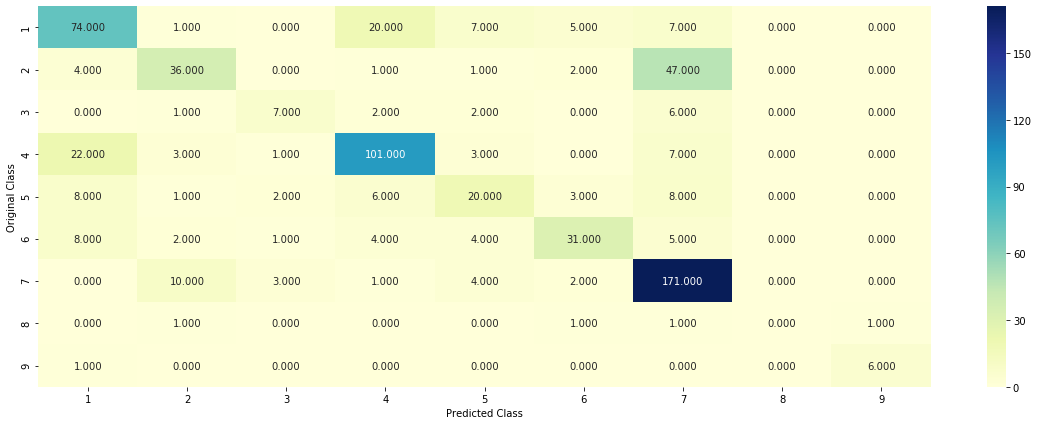

-------------------- Precision matrix (Columm Sum=1) --------------------


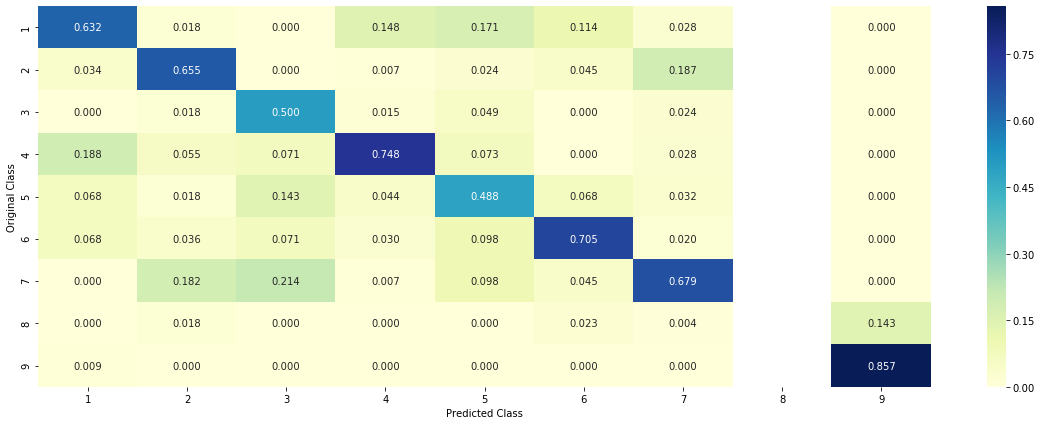

-------------------- Recall matrix (Row sum=1) --------------------


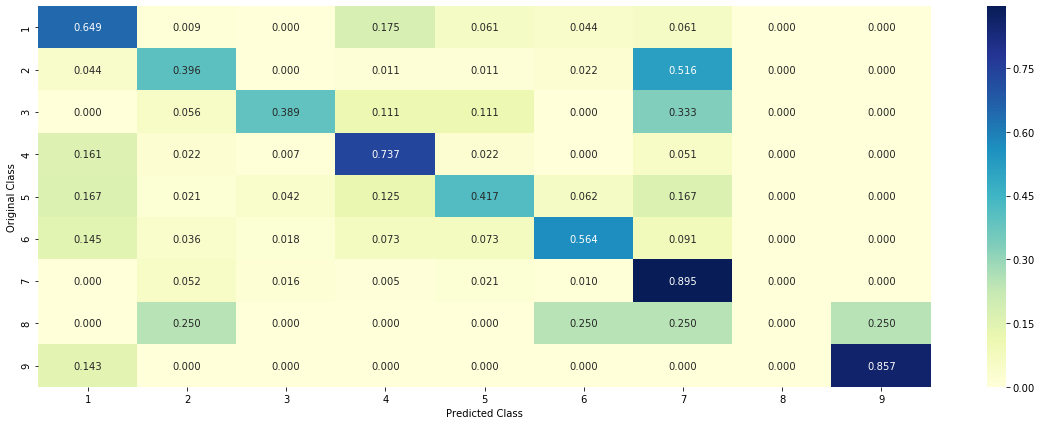

In [126]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_one_hot_encoding,y_train, test_one_hot_encoding,y_test, clf)

### Features importance and interpretability

In [127]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

### Correctly classified point

In [128]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_one_hot_encoding,y_train)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_one_hot_encoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_one_hot_encoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.000e+00 2.000e-04 1.491e-01 8.465e-01 2.000e-04 1.000e-04 0.000e+00
  3.400e-03 4.000e-04]]
Actual Class : 4
--------------------------------------------------
109 Text feature [suppressor] present in test data point [True]
131 Text feature [activating] present in test data point [True]
228 Text feature [kinase] present in test data point [True]
265 Text feature [riley] present in test data point [True]
331 Text feature [harboring] present in test data point [True]
417 Text feature [concentrations] present in test data point [True]
464 Text feature [ruvalcaba] present in test data point [True]
480 Text feature [bannayan] present in test data point [True]
488 Text feature [statistically] present in test data point [True]
Out of the top  500  features  9 are present in query point


### Incorrectly classified point

In [133]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_one_hot_encoding,y_train)
test_point_index = 80
no_feature = 500
predicted_cls = sig_clf.predict(test_one_hot_encoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_one_hot_encoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1189 0.152  0.0038 0.0829 0.0615 0.0277 0.5326 0.014  0.0065]]
Actual Class : 2
--------------------------------------------------
81 Text feature [transforming] present in test data point [True]
84 Text feature [missense] present in test data point [True]
113 Text feature [constitutively] present in test data point [True]
141 Text feature [transformation] present in test data point [True]
174 Text feature [oncogenes] present in test data point [True]
185 Text feature [oncogene] present in test data point [True]
220 Text feature [loss] present in test data point [True]
230 Text feature [downstream] present in test data point [True]
266 Text feature [activation] present in test data point [True]
318 Text feature [activating] present in test data point [True]
330 Text feature [stability] present in test data point [True]
357 Text feature [function] present in test data point [True]
360 Text feature [inactivating] present in test data

### Without class weight is balanced

In [ ]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_one_hot_encoding,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_one_hot_encoding,y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_one_hot_encoding)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_one_hot_encoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_one_hot_encoding, y_train)

predict_y = sig_clf.predict_proba(train_one_hot_encoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_one_hot_encoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_one_hot_encoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [ ]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_one_hot_encoding,y_test, test_one_hot_encoding,y_test, clf)

## Linear-svm model with Hyper-parameter tuning

for C = 1e-05
Log Loss : 1.2730598939469062
for C = 0.0001
Log Loss : 1.233775679117377
for C = 0.001
Log Loss : 1.1626546679369767
for C = 0.01
Log Loss : 1.1769341790370416
for C = 0.1
Log Loss : 1.3704405578069283
for C = 1
Log Loss : 1.6936146257668454
for C = 10
Log Loss : 1.7051338393240203
for C = 100
Log Loss : 1.7051388797562625


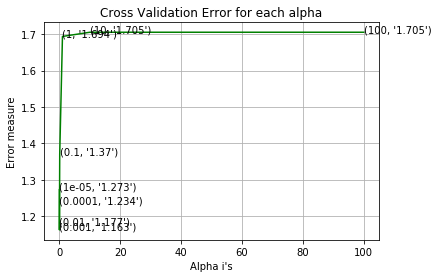

For values of best alpha =  0.001 The train log loss is: 0.5272339610212455
For values of best alpha =  0.001 The cross validation log loss is: 1.1626546679369767
For values of best alpha =  0.001 The test log loss is: 1.1112370248034904


In [139]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_one_hot_encoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_one_hot_encoding, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_one_hot_encoding)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_one_hot_encoding,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_one_hot_encoding,y_train)

predict_y = sig_clf.predict_proba(train_one_hot_encoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_one_hot_encoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_one_hot_encoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.1112370248034904
Number of mis-classified points : 0.3263157894736842
-------------------- Confusion matrix --------------------


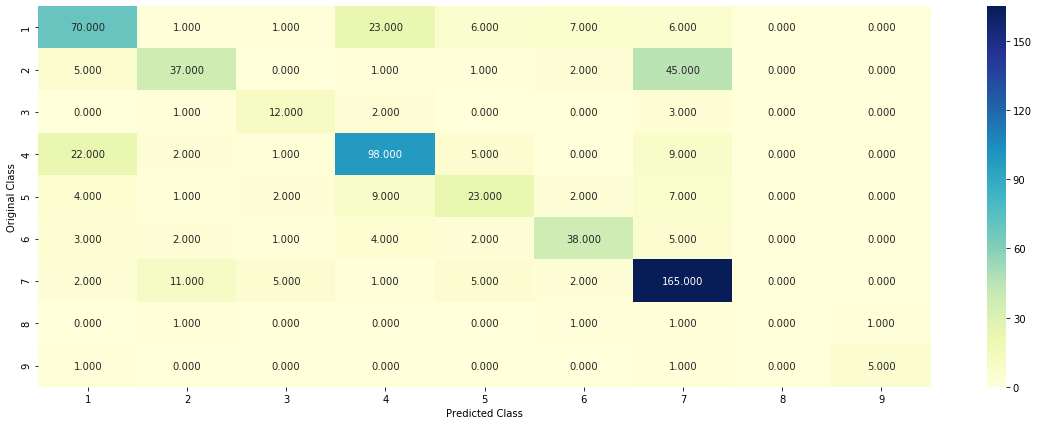

-------------------- Precision matrix (Columm Sum=1) --------------------


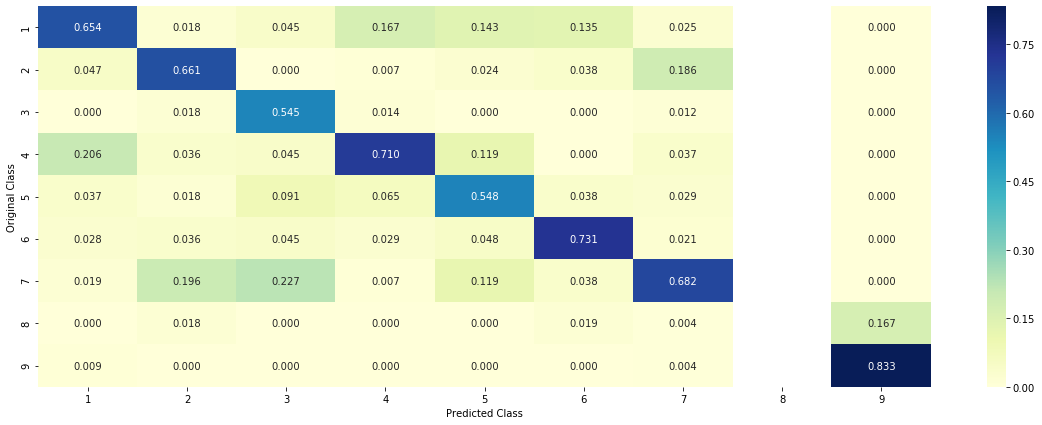

-------------------- Recall matrix (Row sum=1) --------------------


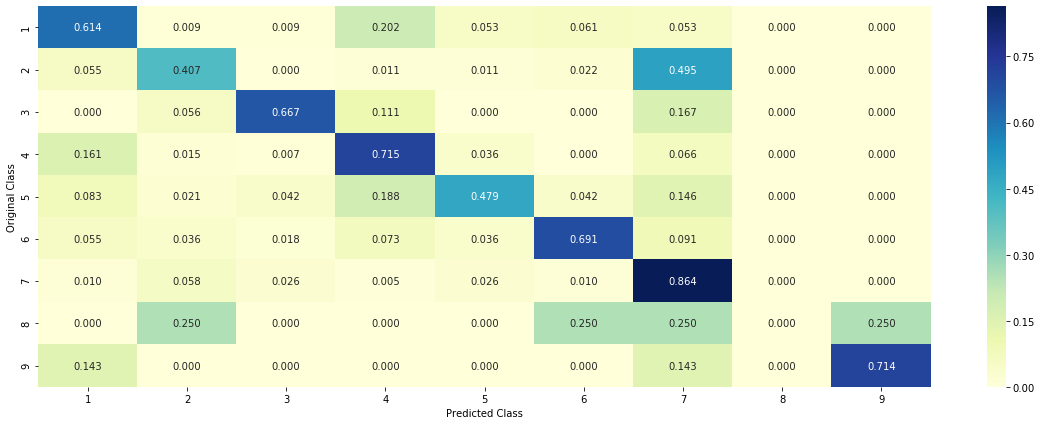

In [142]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
predict_and_plot_confusion_matrix(train_one_hot_encoding,y_train,test_one_hot_encoding,y_test, clf)

### feature importance and interpretability

#### For correctly classified points

In [147]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_one_hot_encoding,y_train)
test_point_index = 30
no_feature = 500
predicted_cls = sig_clf.predict(test_one_hot_encoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_one_hot_encoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.1014 0.039  0.175  0.1701 0.4034 0.0213 0.0779 0.0061 0.0058]]
Actual Class : 5
--------------------------------------------------
Out of the top  500  features  0 are present in query point


#### For incorrectly classified point

In [146]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_one_hot_encoding,y_train)
test_point_index = 80
no_feature = 500
predicted_cls = sig_clf.predict(test_one_hot_encoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_one_hot_encoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1705 0.1553 0.0087 0.0852 0.0506 0.0233 0.4942 0.0055 0.0067]]
Actual Class : 2
--------------------------------------------------
414 Text feature [transforming] present in test data point [True]
428 Text feature [transformation] present in test data point [True]
Out of the top  500  features  2 are present in query point


## Random Forest with hyper-parameter tuning

for n_estimators = 100 and max depth =  5
Log Loss : 1.2586272551411621
for n_estimators = 100 and max depth =  10
Log Loss : 1.1868811648252853
for n_estimators = 200 and max depth =  5
Log Loss : 1.2501984589309212
for n_estimators = 200 and max depth =  10
Log Loss : 1.174813583957043
for n_estimators = 500 and max depth =  5
Log Loss : 1.2461964434391595
for n_estimators = 500 and max depth =  10
Log Loss : 1.1682551603983067
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2428165147089065
for n_estimators = 1000 and max depth =  10
Log Loss : 1.167495895831685
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2440181620148507
for n_estimators = 2000 and max depth =  10
Log Loss : 1.1654529177416495


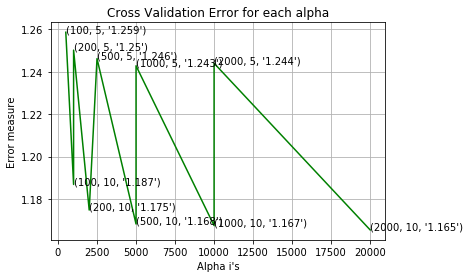

For values of best estimator =  2000 The train log loss is: 0.6872394107818645
For values of best estimator =  2000 The cross validation log loss is: 1.1654529177416495
For values of best estimator =  2000 The test log loss is: 1.1626339514669595


In [148]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_one_hot_encoding, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_one_hot_encoding,y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_one_hot_encoding)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_one_hot_encoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_one_hot_encoding,y_train)

predict_y = sig_clf.predict_proba(train_one_hot_encoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_one_hot_encoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_one_hot_encoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.1626339514669595
Number of mis-classified points : 0.37894736842105264
-------------------- Confusion matrix --------------------


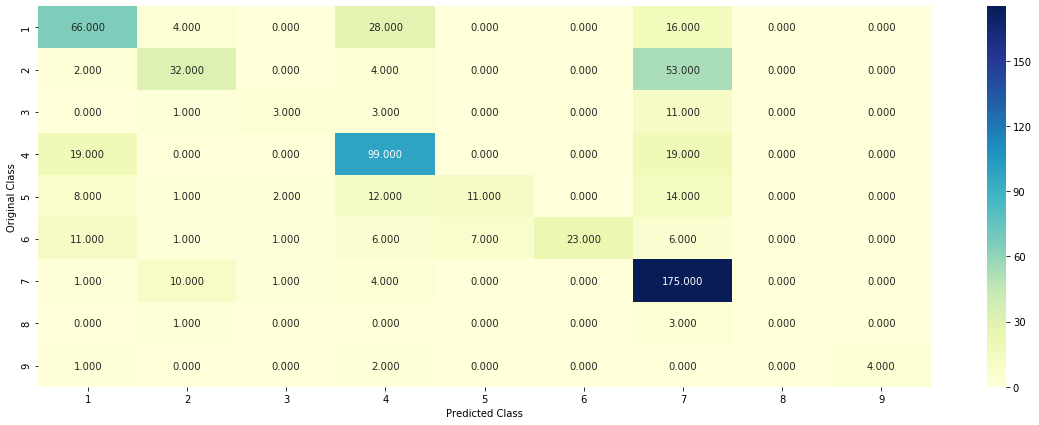

-------------------- Precision matrix (Columm Sum=1) --------------------


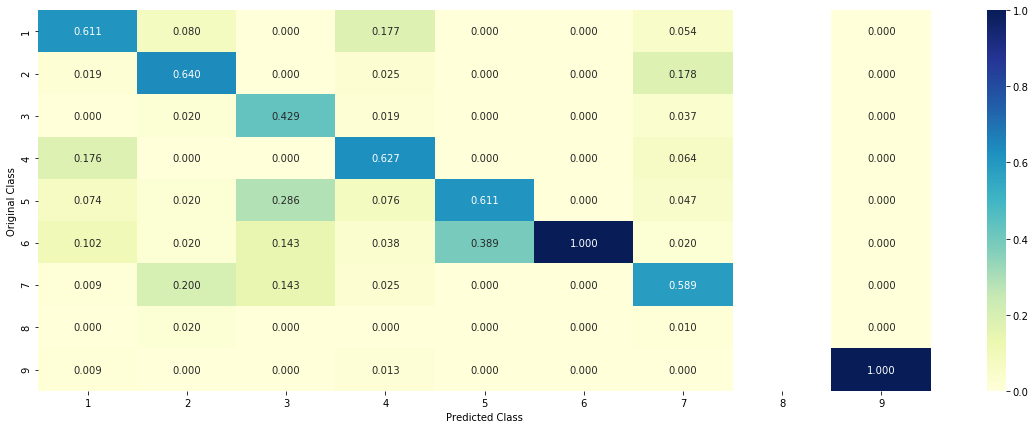

-------------------- Recall matrix (Row sum=1) --------------------


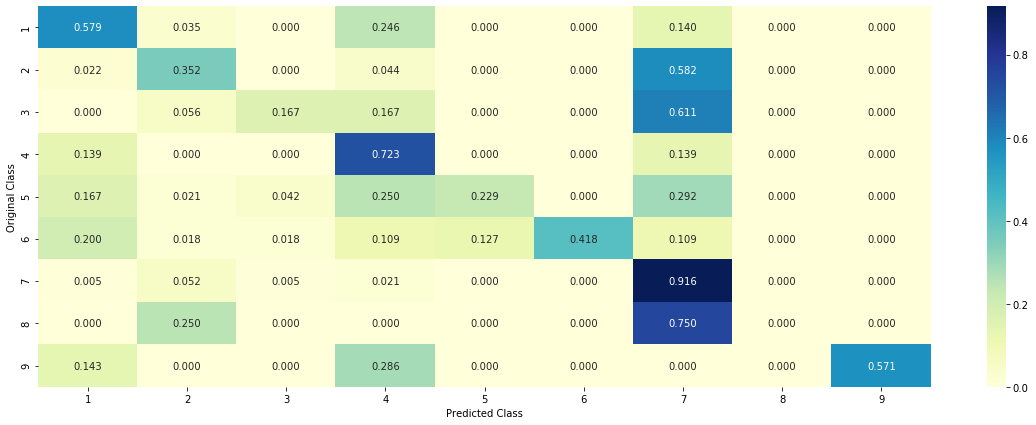

In [152]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_one_hot_encoding,y_train,test_one_hot_encoding,y_test,clf)

### Stack the models

### testing with hyper parameter tuning

In [156]:
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_one_hot_encoding, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_one_hot_encoding,y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_one_hot_encoding,y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_one_hot_encoding, y_train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(cv_one_hot_encoding))))
sig_clf2.fit(train_one_hot_encoding, y_train)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf2.predict_proba(cv_one_hot_encoding))))
sig_clf3.fit(train_one_hot_encoding,y_train)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf3.predict_proba(cv_one_hot_encoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_one_hot_encoding,y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(cv_one_hot_encoding))))
    log_error =log_loss(y_cv, sclf.predict_proba(cv_one_hot_encoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.12
Support vector machines : Log Loss: 1.69
Naive Bayes : Log Loss: 1.26
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 1.818
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.723
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.334
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.190
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.467
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.807


### testing the model with the best hyper parameters

Log loss (train) on the stacking classifier : 0.5031280477017218
Log loss (CV) on the stacking classifier : 1.1899894592050202
Log loss (test) on the stacking classifier : 1.1751591586507169
Number of missclassified point : 0.3533834586466165
-------------------- Confusion matrix --------------------


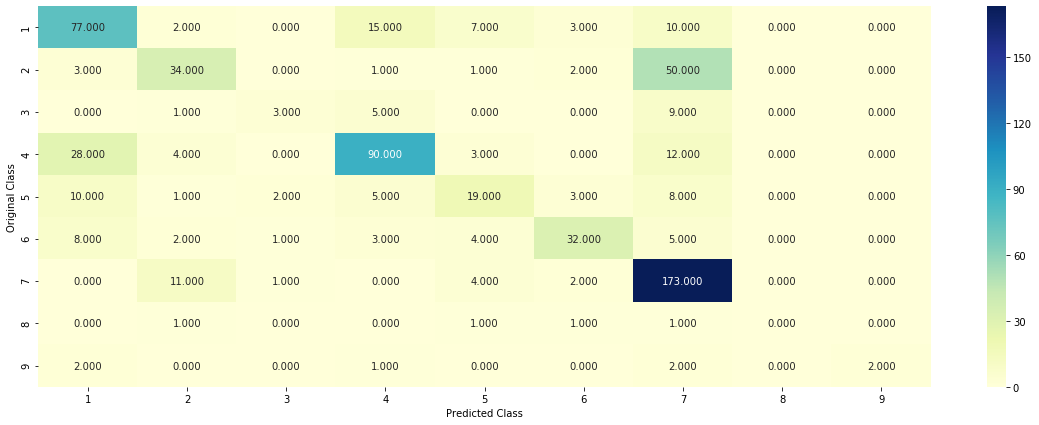

-------------------- Precision matrix (Columm Sum=1) --------------------


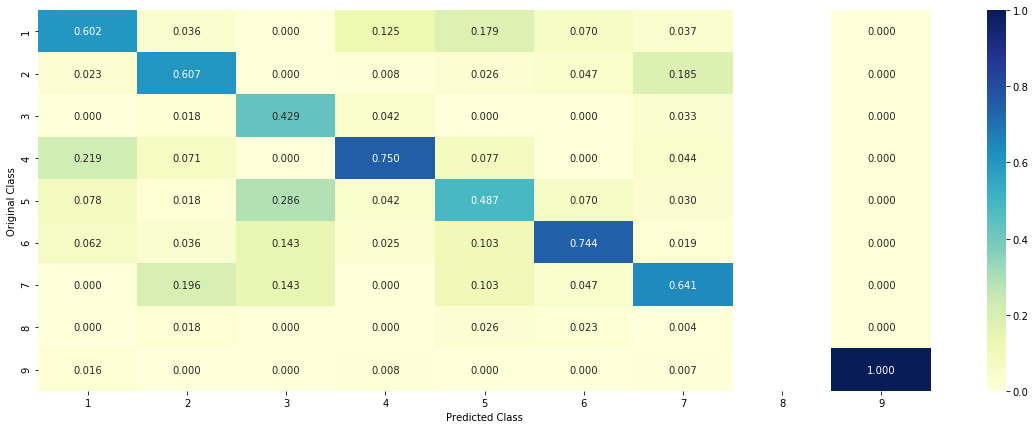

-------------------- Recall matrix (Row sum=1) --------------------


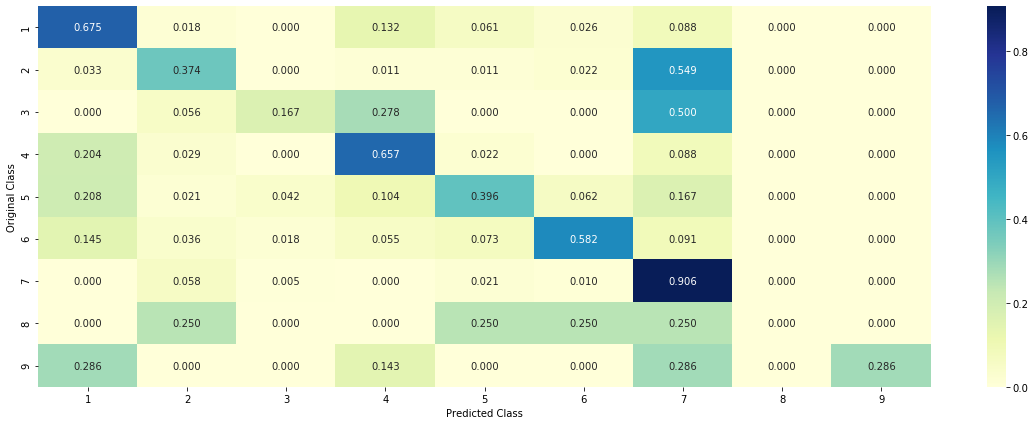

In [159]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_one_hot_encoding,y_train)

log_error = log_loss(y_train, sclf.predict_proba(train_one_hot_encoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(cv_one_hot_encoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(test_one_hot_encoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_one_hot_encoding)- y_test))/y_test.shape[0])
plot_confusion_matrix(test_y=y_test, predict_y=sclf.predict(test_one_hot_encoding))

### Maximum Voting classifier

Log loss (train) on the VotingClassifier : 0.8610972762216734
Log loss (CV) on the VotingClassifier : 1.188675578161039
Log loss (test) on the VotingClassifier : 1.194139174433849
Number of missclassified point : 0.35639097744360904
-------------------- Confusion matrix --------------------


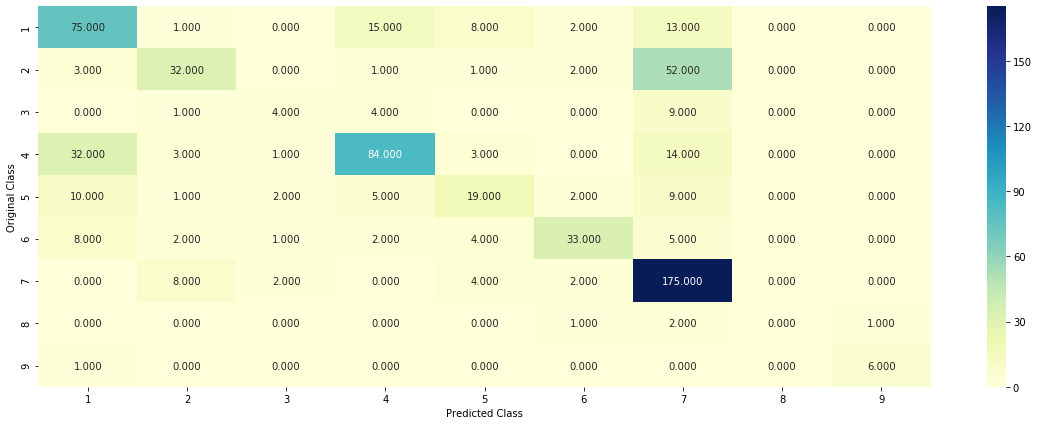

-------------------- Precision matrix (Columm Sum=1) --------------------


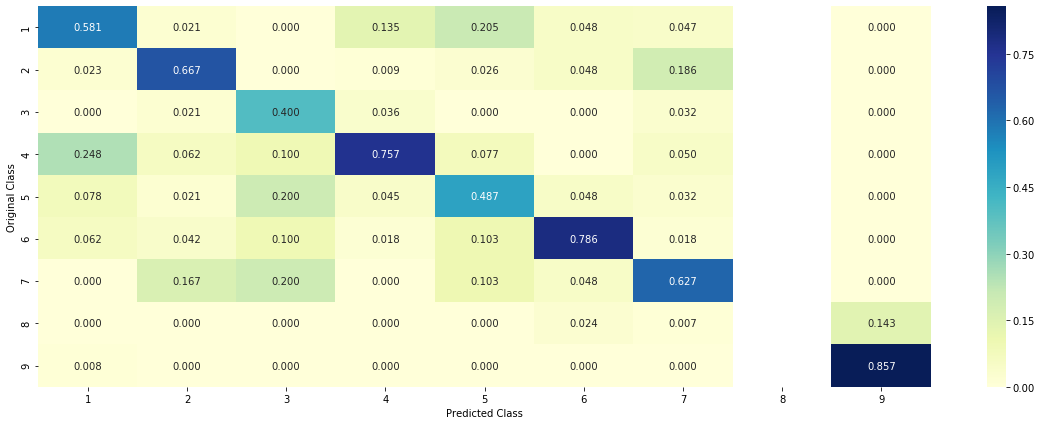

-------------------- Recall matrix (Row sum=1) --------------------


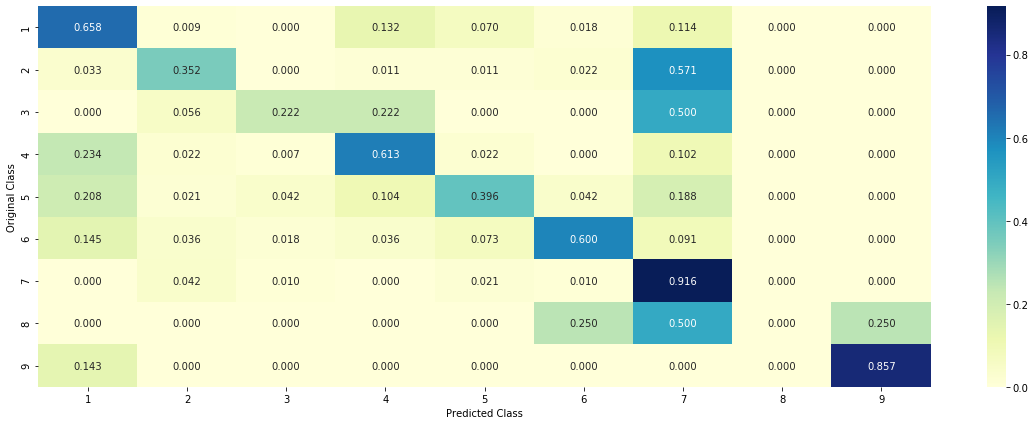

In [160]:
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_one_hot_encoding,y_train)
print("Log loss (train) on the VotingClassifier :", log_loss(y_train, vclf.predict_proba(train_one_hot_encoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(y_cv, vclf.predict_proba(cv_one_hot_encoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(y_test, vclf.predict_proba(test_one_hot_encoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_one_hot_encoding)- y_test))/y_test.shape[0])
plot_confusion_matrix(test_y=y_test, predict_y=vclf.predict(test_one_hot_encoding))

## Conclusion:


In [13]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Si.no.","features","model","test-Multi-Log-Loss","Percentage of misclasiification"]
x.add_row(["1","Random-features","Random-model","2.503","nil"])
x.add_row(["2","one-hot-encoding","Multinomial-Naive bayes","1.249","37.89%"])
x.add_row(["3","one-hot-encoding","Logistic-Regression","1.094","32.93%"])
x.add_row(["4","one-hot-encoding","Linear SVM","1.111","32.63%"])
x.add_row(["5","one-hot-encoding","RandomForest","1.1626","37.87%"])
x.add_row(["6","one-hot-encoding","stack-model","1.175","35.33%"])
print(x)

+--------+------------------+-------------------------+---------------------+---------------------------------+
| Si.no. |     features     |          model          | test-Multi-Log-Loss | Percentage of misclasiification |
+--------+------------------+-------------------------+---------------------+---------------------------------+
|   1    | Random-features  |       Random-model      |        2.503        |               nil               |
|   2    | one-hot-encoding | Multinomial-Naive bayes |        1.249        |              37.89%             |
|   3    | one-hot-encoding |   Logistic-Regression   |        1.094        |              32.93%             |
|   4    | one-hot-encoding |        Linear SVM       |        1.111        |              32.63%             |
|   5    | one-hot-encoding |       RandomForest      |        1.1626       |              37.87%             |
|   6    | one-hot-encoding |       stack-model       |        1.175        |              35.33%       